# Communicating Data Findings - Ford GoBike System Data

### by Rodrigo Brust

##### Project 05 - Data Analyst Udacity Nanodegree

<a id = 'table'></a>
## Table of Contents

1. [Introduction](#intro)
2. [Questions](#quest)
3. [Data Cleaning](#clean)
4. [Data Visualization](#dataviz)

    4.1 [Exploratory Data Analysis](#explo)
    
    4.2 [Explanatory Data Analysis](#expla)

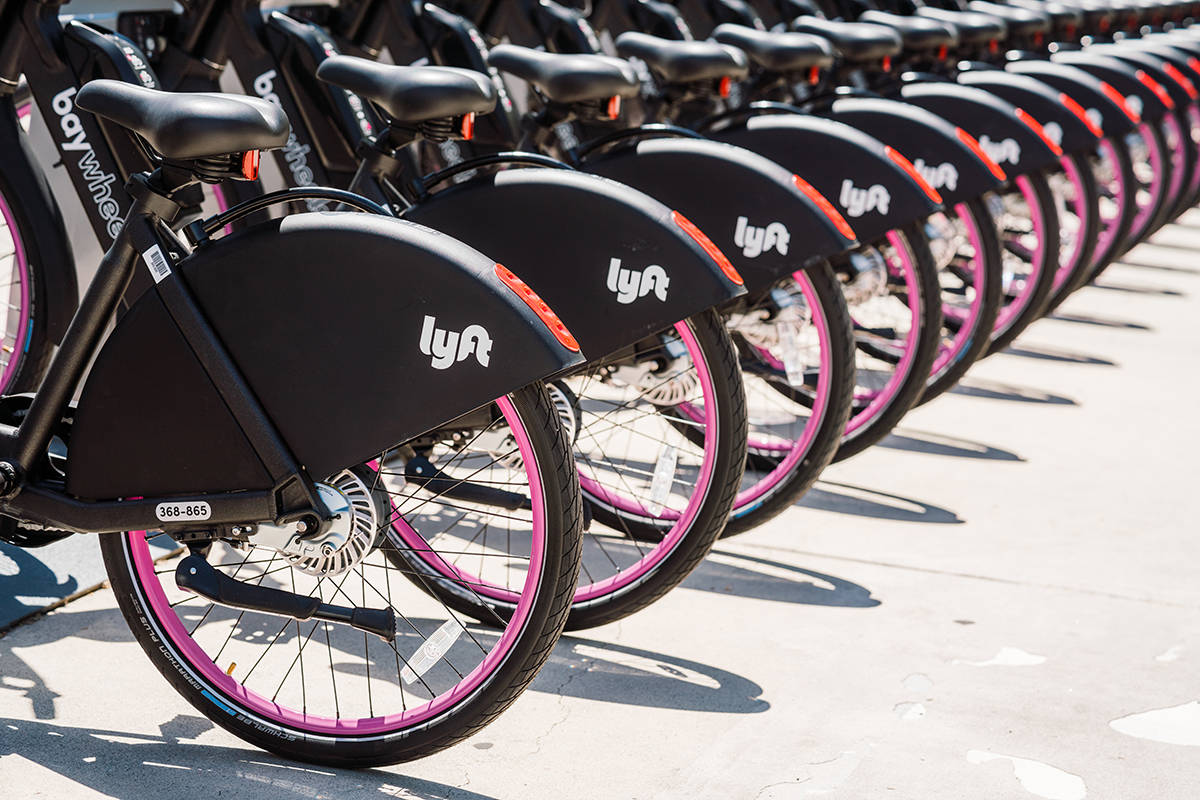

<a id='intro'></a>
# 1 - Introduction

This is notebook is the fifth and last project of Udacity Data Analyst Nanodegree. 

In this last project we're going to work with Exploratory Data Analysis and Explanatory Data Analysis, besides a few other topics about data analysis, such as data cleaning. 

The dataset chosen was the Lyft Bike Sharing System in San Francisco Area. With this data, we'll make several types of visualizations, such as univariate, bivariate, and multivariate plots. The main aim here is to explore many relationships in the data set.

#### 1.1 - What is the structure of the dataset?
The dataset is a csv file with information of all bike rides, when and where it started and finished, the user type and the duration of the ride. 

#### 1.2 - What are the main features of interest in this dataset?
The main features to take a look are: the duration of the rides and wich period it's more commom, where are the stations located, the behavior of each user type.

______________________________________________

<a id='quest'></a>
# 2 - Questions

___
   [Home](#table)
   
   
Every Data Analysis project tries to answer a few questions, and that's why we bring you the raised questions below.

- When are most trips taken in terms of time of day, day of the week, or month of the year?

- How long does the average trip take?

- Does the above depend on if a user is a subscriber or customer?

- What is the spatial distribuition of bike stations?

<a id='clean'></a>
# 3 - Data Cleaning

___
   [Home](#table)

In [1]:
#Importing the libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium 

%matplotlib inline 

In [2]:
#Loading the file
filename = '2017-fordgobike-tripdata_1.csv'
bike_df = pd.read_csv(filename)
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
#now let's see the shape, datatypes, and other info about the dataset
print(bike_df.shape)
print(bike_df.info())

(519700, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usag

In [4]:
#checking how many stations are there
bike_df.start_station_id.nunique()

272

In [5]:
#checking the amount of subscribers and custumers
bike_df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [6]:
#mean in minutes
bike_df.duration_sec.mean()/60

18.316825347957156

#### Cleaning check list

- `Start Time`and `End Time`must be converted to pd.datetime ✅ 

- Convert `duration_sec` to `duration_min` so we can have a better time idea. ✅ 

In [7]:
#creating a copy of the main dataframe

bike = bike_df.copy()
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [8]:
#first, lets convert start time and end time to datetime
bike.start_time = pd.to_datetime(bike['start_time'])
bike.end_time = pd.to_datetime(bike['end_time'])
bike.start_time.dtype, bike.end_time.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [9]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [10]:
#now lets convert the trip durantion from seconds to minutes. This will give us a better time perspective.
bike['duration_min'] = bike.duration_sec/60

In [11]:
bike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min
477107,468,2017-07-29 15:03:27.026,2017-07-29 15:11:15.037,97,14th St at Mission St,37.768265,-122.42011,122,19th St at Mission St,37.760299,-122.418892,761,Subscriber,7.8


In [12]:
#in here, I just saved the cleaned file.
bike.to_csv('bike_clean.csv', index = False)

<a id='dataviz'></a>
# 4 - Data Visualization

___
   [Home](#table)

In [13]:
#creating a new df from the cleaned file.
bikec = bike.copy()
bikec.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min
127474,338,2017-11-16 18:10:03.511,2017-11-16 18:15:42.339,60,8th St at Ringold St,37.77452,-122.409449,45,5th St at Howard St,37.781752,-122.405127,2029,Subscriber,5.633333


<a id='explo'></a>
## 4.1 -  Exploratory Data Analysis

___
   [Home](#table)

### 4.1.1 - Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

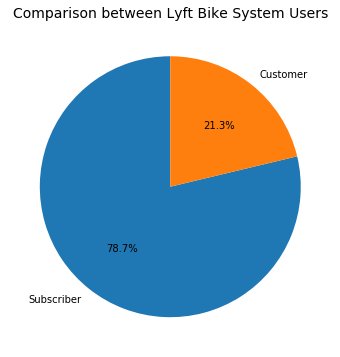

In [19]:
#lets check the percentages of the user type.

#first, lets get the total amount of users
total_user = bikec.user_type.shape[0]

#now, lets get the percentages
sub_user = bikec.query('user_type == "Subscriber"').count()[12]/total_user
cos_user = bikec.query('user_type == "Customer"').count()[12]/total_user

#the last step is to convert the values and labels to a list, and then plot 'em.
percentages = [sub_user,cos_user]
label = ['Subscriber','Customer']

#Setting the figure size and plotting
plt.figure(figsize = [6,6])
plt.pie(x = percentages,labels = label, autopct='%1.1f%%', startangle = 90);
plt.title('Comparison between Lyft Bike System Users', fontsize = 14);

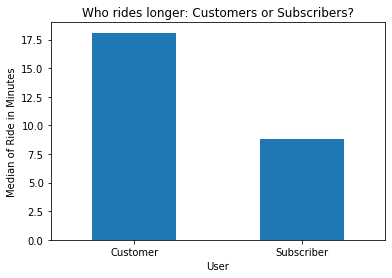

In [20]:
#Now, who rides for more time: customers or subscribers?

user = bikec.groupby(['user_type']).median()
user.duration_min.plot(kind = 'bar')
plt.xlabel('User')
plt.ylabel('Median of Ride in Minutes')
plt.title('Who rides longer: Customers or Subscribers?', fontsize = 12)
plt.xticks(rotation = 0);

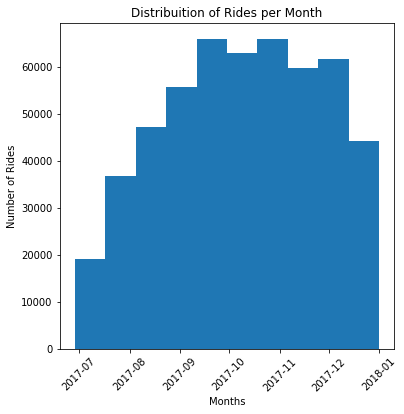

In [47]:
#checking the distribuiton of start_time rides
plt.figure(figsize = [6,6])
plt.hist(data = bikec, x = 'start_time');
plt.xticks(rotation = 45)
plt.title('Distribuition of Rides per Month')
plt.xlabel('Months')
plt.ylabel('Number of Rides');

- The months between September and November where the ones with the highest number of rides. I was expecting more trips in the summer months, but we can see that it didn't happen. Maybe because it's too hot and people rather take a Uber ride.

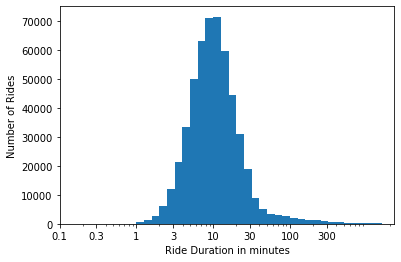

In [23]:
#now, let's take a look at the ride duration distribuiton.
bins = 10 ** np.arange(0,3.2+0.1, 0.1)
plt.hist(data = bikec, x = 'duration_min', bins = bins)
ticks = [0.1,0.3,1,3,10,30,100,300]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
plt.ylabel('Number of Rides')
plt.xlabel('Ride Duration in minutes');

 - As far we can see, the ride's duration is a normal distribuition.

In [28]:
#creating a new dataframe so I can put the time as index. 
bike_i = bikec.set_index(pd.DatetimeIndex(bikec['start_time']))

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min
start_time,,,,,,,,,,,,,,
2017-12-31 16:57:39.654,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667


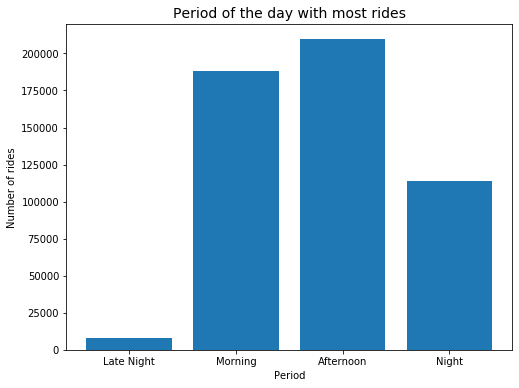

In [30]:
#once the dates were indexed, I'm able to set the periods of time, and then, have the sets for further analysis.
late = bike_i.between_time(start_time = '00:00:00',end_time = '05:59:59') #selecting the rides from 00h to 5:59
morning = bike_i.between_time(start_time = '06:00:00',end_time = '11:59:59') #selecting the rides from 6h to 11:59
afternoon = bike_i.between_time(start_time = '12:00:00',end_time = '17:59:59') #selecting the rides from 12h to 17h59
night = bike_i.between_time(start_time = '18:00:00',end_time = '23:59:59') #selecting the rides from 18h to 23:59

#the lengh of all periods in a list.
rides_period =[(len(late)),(len(morning)),(len(afternoon)),(len(night))]
period = ['Late Night','Morning','Afternoon','Night'] #setting the labels
plt.figure(figsize = [8,6])
plt.bar(period,rides_period) #plotting the chart
plt.title('Period of the day with most rides', size = 14)
plt.xlabel('Period')
plt.ylabel('Number of rides');

- We can see that between 6AM and 5:59PM are the periods of the day with most rides. What was already expected.

In [33]:
#What are the stations with the highest number os users?

#Getting the most returned stations' name
top_stations = bikec.end_station_name.value_counts()[:5].index.tolist()
top_stations

['San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'The Embarcadero at Sansome St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)']

In [34]:
#getting the value of bike returns in each station
value_stations = bikec.end_station_name.value_counts().tolist()[:5]
value_stations

[17378, 17109, 16531, 13658, 13443]

In [35]:
#in here I created another list because the names were too big. This is getting better in the labeling.
label_station = ['San Francisco Caltrain','San Francisco Ferry Building','The Embarcadero at Sansome St','San Francisco Caltrain Station 2','Montgomery St BART Station']

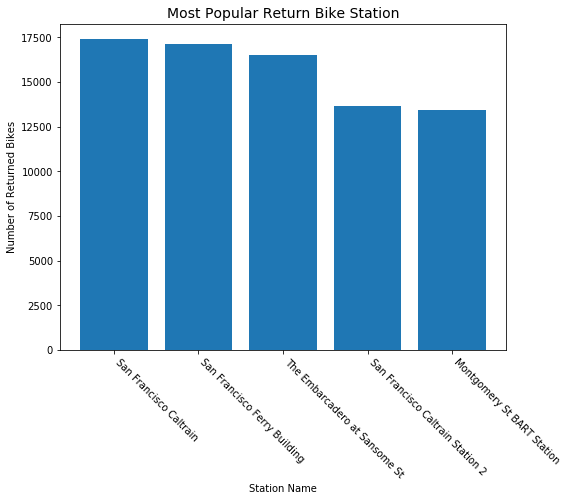

In [36]:
#the lengh of all periods in a list.
value_station = value_stations
station = top_stations #setting the labels
plt.figure(figsize = [8,6])
plt.bar(label_station,value_station) #plotting the chart
plt.title('Most Popular Return Bike Station', size = 14)
plt.xlabel('Station Name')
plt.ylabel('Number of Returned Bikes')
plt.xticks(rotation = "-45", ha = 'left'); #this ha input is a setting to align the labels and the ticks.

### 4.1.2 - Bivariate Exploration
[Home](#table)

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

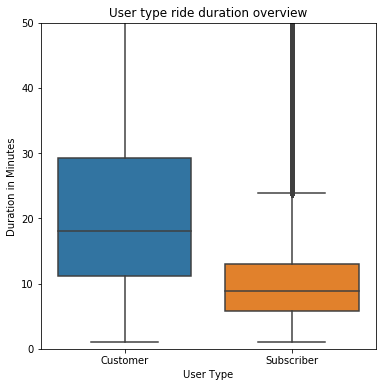

In [21]:
#Boxplot UserType vs Time
plt.figure(figsize=[6,6])
sb.boxplot(data = bikec, y = 'duration_min',x = 'user_type')
plt.ylim(0,50)
plt.ylabel('Duration in Minutes')
plt.xlabel('User Type')
plt.title('User type ride duration overview');

- Even though customers are about 20% of all rides, they are responsable for longer trips. This might be because the custumers are casual riders, and they cycle in the weekends and holidays, while subscribers ride in a daily basis.

##### Disclamer: The chart above had its yaxis limited in order to perform a better visualization.

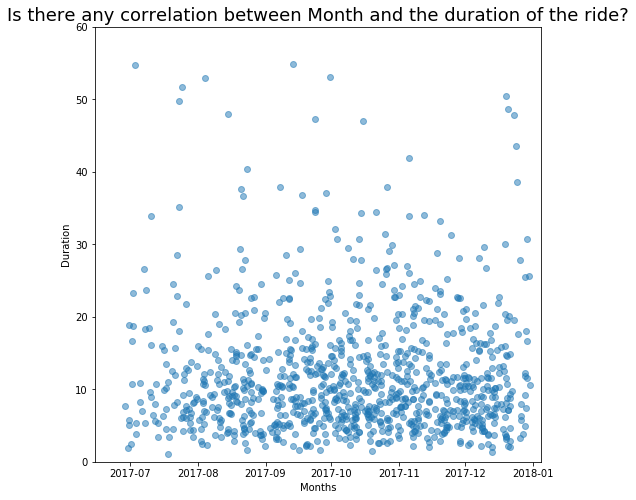

In [31]:
sample = bike_i.sample(1000) #create a new df to get a sample
plt.figure(figsize = [8,8]) #setting the size of fig
plt.scatter(data = sample, x = 'start_time', y = 'duration_min', alpha = 0.5 )#choosing the df, x and y
plt.xlim(pd.Timestamp('2017-06-15'),pd.Timestamp('2018-01-05')) #limiting the time axis
plt.ylim(0,60);#limiting the duration axis.
plt.title('Is there any correlation between Month and the duration of the ride?', size = 18);
plt.xlabel('Months')
plt.ylabel('Duration');

 - We can see no relation between the months (date) and the duration of the rides.

### 4.1.3 - Multivariate Exploration
[Home](#table)

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<Figure size 576x576 with 0 Axes>

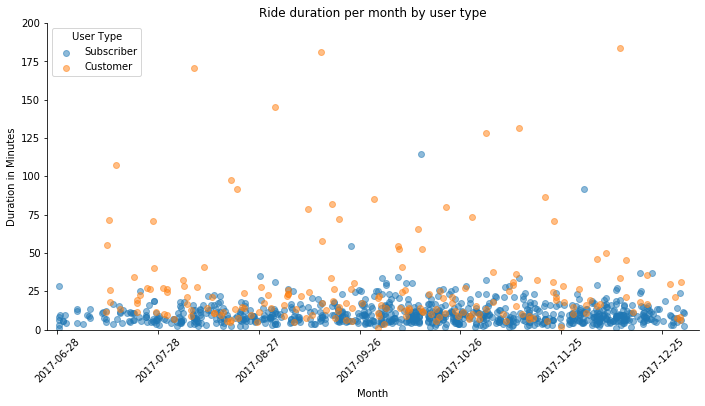

In [131]:
plt.figure(figsize = [8,8]) #setting the size of fig

#making some changes in the label and the number that will be used in x axis, avoiding future problems.
dates_str  = bc.start_time.astype('str').to_list() #create a list with timestamp as str
dates_str_onlydate = [] #empty list that will be used
for x in dates_str: #for lop to get the timestamp and cut the hours, only dates left
    cut = x[:10]
    dates_str_onlydate.append(cut) #appending

dates_timestamp = bc.start_time #picking the timestamp number. This is going to be our numerical reference.

#starting to build the plot
bike_clients = bikec.loc[bikec['user_type'].isin(['Subscriber','Customer'])]
bc = bike_clients.sample(1000)
g = sb.FacetGrid(data = bc, hue = 'user_type', height=5, aspect=2)
g.map(plt.scatter, 'start_time','duration_min', alpha = .5);
plt.ylim(0,200), 
plt.xlim(pd.Timestamp('2017-06-25'),pd.Timestamp('2018-01-05'))
plt.xlabel('Month'), plt.ylabel('Duration in Minutes')
plt.xticks(np.arange(np.datetime64('2017-06-28'), np.datetime64('2018-01-05'),30),rotation = 45) #labeling with 1 - timestamp number, 2 - str label converter from above
plt.legend(title = 'User Type')
plt.title('Ride duration per month by user type');

 - With these charts, we can see that the subscribers' ride are quicker than the costumers' ride.

In [37]:
#creating a new column to make month analysis
bikec['month'] = pd.DatetimeIndex(bikec['start_time']).month

In [38]:
#the month with the most number of rides is October. 
bikec.month.value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: month, dtype: int64

In [39]:
#creating a new df only for subscribers
subs = bikec.query('user_type == "Subscriber"')
#getting the months and coutns from value counts and converting to lists
month_subs_count = subs.month.value_counts().tolist()

#creating a new df only for subscribers
cost = bikec.query('user_type == "Customer"')
#getting the months and coutns from value counts and converting to lists
month_cost_count = cost.month.value_counts().tolist()

In [41]:
#creating the percentages of the rides for subscribers per month.
perc_month_subs_count = []
for i in month_subs_count:
    percent = i/subs.shape[0]
    perc_month_subs_count.append(percent)
perc_month_subs_count

#creating the percentages of the rides for costumers per month.
perc_month_cost_count = []
for i in month_cost_count:
    percent = i/cost.shape[0]
    perc_month_cost_count.append(percent)
perc_month_cost_count

[0.2138797253378296,
 0.1945996139090487,
 0.18174131906262983,
 0.17979864623805683,
 0.1485252791828556,
 0.07598416538376952,
 0.005471250885809935]

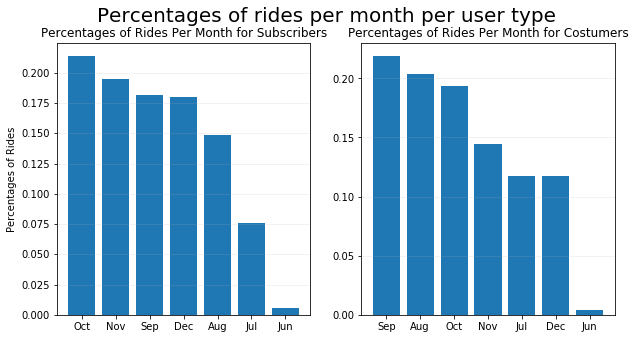

In [44]:
#setting the labels more friendly
label_month_s = ['Oct','Nov','Sep','Dec','Aug','Jul','Jun']
label_month_c = ['Sep','Aug','Oct','Nov','Jul','Dec','Jun']

#creating the whole plot
plt.figure(figsize = [10,5])
plt.suptitle('Percentages of rides per month per user type', size = 20)

#setting the 1st plot
plt.subplot(1,2,1)
plt.bar(label_month_s,perc_month_subs_count)
plt.ylabel('Percentages of Rides')
plt.title('Percentages of Rides Per Month for Subscribers')
plt.grid(True, axis = 'y', alpha = 0.2)


#setting the 2nd plot
plt.subplot(1,2,2)
plt.bar(label_month_c,perc_month_cost_count)
plt.title('Percentages of Rides Per Month for Costumers')
plt.grid(True, axis = 'y', alpha = 0.2)

- We can see that the amount of rides of subscribers are way higher due the fact that they are about 80% of the bike system's clients. It's confirmed in the pie chart.

- The distribuition of the months with the biggest amount of rides are different to each other. This seems to have no correlation. 

- An interesing fact that `Oct`and `Sep`appears in both TOP3.


### 4.1.4 - Spatial Exploration
[Home](#table)

In [25]:
#Unique bike stations -- now, I want to create a  new df without id repetition, jsut to get the lat long of them
print(bikec.start_station_id.nunique())

#Creating a list with all stations name, lat and long.Then we'll plot them in a map.
station = bikec.copy()

station_name = station['start_station_name'].unique().tolist()
lon_id = station['start_station_longitude'].unique().tolist()
lat_id = station['start_station_latitude'].unique().tolist()

272


In [53]:
%%time

#Where are these bike stations?

sf = folium.Map(location = [37.6089,-122.0963], zoom_start= 10, control_scale=True) #creating the map

#making a loop so it will iterate through all lat, long and name list, and then plot.

lat=lat_id
lon=lon_id
name=station_name

fg=folium.FeatureGroup(name="my map")

for lt, ln, nm in zip(lat,lon,name):
         fg.add_child(folium.Marker(location=[lt,ln],popup="<b>Name:</b> {}".format(nm), icon=folium.Icon(color='pink')))

sf.add_child(fg)

Wall time: 34.9 ms


- We can see that the bike stations are concentrated in San Francisco, Oakland and surroundings. Besides these two cities, there are a lot of bike stations in San Jose too.